# Ligações para o 911 do Condado de Montgomery (Montgomery County), Pensilvânia
-----

O **911** ou **9-1-1** é um contato de emergência para o Plano de Numeração da América do Norte (NANP), este número é válido em outros países além dos Estados Unidos e Canadá. Em 98% das localidades nos Estados Unidos e no Canadá ao discar 911 a ligação é redirecionada para um escritório de despachos que faz a apuração da ligação e pode enviar atendentes de emergência para o local do chamador em uma emergência.

Nos Estados Unidos os esforços para desenvolvimento de um número de emergência começaram e 1957 utilizando o padrão 999, em 1968 foi adotado o 911 nacionalmente pois era mais fácil de digitar e semelhante a outros números especiais vigentes no país. Desde dezembro de 2017 o 911 pode ser acessado por 98,9% da população dos Estados Unidos.

Existe ainda o *911 Aprimorado (E-911 ou E911)*, que fornece automaticamente ao despachante o número e a localização do chamador, quando disponível. Cada empresa telefônica possui seu próprio banco de dados para fazer uma localização rápida e eficiente, para telefones celulares a localização pode ser obtida de duas maneiras: a triangulação via radiolocalização da rede celular ou através dos receptores GPS incorporados no aparelho do chamador. 

Outro número de emergência, utilizado em todos os países da União Europeia, é o **112**, este também é válido em outros países fora da União Europeia. No Brasil há números específicos para cada serviço (**190**-polícia militar, **192**-SAMU, **193**-corpo de bombeiros), mas desde meados de 2013 os números 911 e 112 *são redirecionados para serviços de emergência no Brasil*.

-----

Neste dataset vamos analisar com mais atenção as ligações de emergência no [Condado de Montgomery, Pensilvânia](https://www.google.com/maps/place/Condado+de+Montgomery,+PA,+EUA/@40.1017183,-75.5872632,10z/data=!4m5!3m4!1s0x89c69c3956b226eb:0x4b0baa22f9505dbd!8m2!3d40.2290075!4d-75.3878525 "Google Maps"). A base de dados está disponível no [Kaggle](https://www.kaggle.com/mchirico/montcoalert "Emergency - 911 Calls Montgomery County, PA"), também há uma cópia em formato zip na pasta [datasets do meu github](https://github.com/matemagico/data_science).

In [1]:
#importando as bibliotecas que serão utilizadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#especificações para gerar o gráfico na mesma célula e definindo o estilo dos gráficos do seaborn
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#buscando o arquivo com os dados que serão utilizados
df = pd.read_csv('911.csv')

### Dicionário de variáveis
O arquivo em questão está em formato csv e possui 9 colunas dispostas da seguinte maneira:
* **lat**: latitude da chamada;
* **lng**: longitude da chamada;
* **desc**: descrição da chamada;
* **zip**: código postal do local da chamada;
* **title**: título da emergência, existem 3 categorias:
    * EMS: emergências que necessitam de apoio médico;
    * Fire: emergências relacionadas a incêndios;
    * Traffic: emergências relacionadas ao trânsito;
* **timeStamp**: horário e data da chamada de emergência;
* **twp**: município de onde a chamada foi feita;
* **addr**: endereço de onde a chamada foi feita;
* **e**: coluna de índices, sempre será 1.

## 1. Análise Exploratória dos Dados

In [3]:
#informações iniciais de como é o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
#Quantidade de dados ausentes
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [5]:
#visão inicial de como é o dataset
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
type(df['timeStamp'][0])

str

Neste dataset temos 663.522 linhas e 9 colunas, já descritas anteriormente.

Aqui já conseguimos perceber que nas colunas *zip* e *twp* há dados ausentes. A seguir vamos tratar esses dados ausentes usando **mediana** para *zip* e **moda** para *twp*.

Outro fator a se destacar é que a coluna *timeStamp* apresenta dados no formato de texto e não de data e hora como seria o correto, mais a frente essa coluna será devidamente tratada. Essa manipulação com datas está na documentação do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) e do [python](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

### 1.1. Tratamento de Dados

In [7]:
#Tratando os dados ausentes na coluna zip por meio de mediana
df['zip'].fillna(df['zip'].median(), inplace=True)

In [8]:
#Descobrindo a moda da coluna twp
df['twp'].value_counts().iloc[:1]

LOWER MERION    55490
Name: twp, dtype: int64

In [9]:
#Tratando os dados ausentes na coluna twp com a moda descoberta
df['twp'].fillna('LOWER MERION', inplace=True)

In [10]:
#Confirmação do tratamento dos valores ausentes
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [11]:
#Tratando a coluna timeStamp
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')

In [12]:
#Confirmando o tratamento realizado
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

## 2. Criando Recursos

Como mencionado anteriormente existem algumas categorias para cada chamada e elas são mencionadas juntamente com os títulos das chamadas na coluna *title*, mas elas não aparecem de forma clara. Para ficar evidente quais são essas categorias será criada uma nova coluna chamada **reasons**.

Outro ponto é que a coluna *timeStamp* da forma como está não permite uma manipulação simples, para isso serão criadas outras quatro colunas: 
* **hour**: horário em que a chamada foi realizada;
* **month**: mês em que a chamada foi realizada;
* **dayWeek**: dia da semana em que a chamada foi realizada;
* **year**: ano em que a chamada foi realizada

In [13]:
#Função para separar as categorias das chamadas
def motivo(string):
    return string.upper().split(':')[0]

#Aplicando a função para criar a nova coluna
df['reasons'] = df['title'].apply(lambda x: motivo(x))

In [14]:
#Criando a coluna hour
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [15]:
#Criando a coluna month
df['month'] = df['timeStamp'].apply(lambda x: x.month)

In [16]:
#Criando a coluna dayWeek
df['dayWeek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [17]:
#Verificando os dados da coluna dayWeek
df['dayWeek'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

Como mostra a célula anterior a coluna *dayWeek* contém valores númericos e não os dias da semana, a alteração será feita na célula de código abaixo.

In [18]:
#Dicionário contendo os valores que correspondem aos dias da semana
wmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['dayWeek'] = df['dayWeek'].map(wmap)

In [19]:
#Criando a coluna year
df['year'] = df['timeStamp'].apply(lambda x: x.year)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        663522 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663522 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
 9   reasons    663522 non-null  object        
 10  hour       663522 non-null  int64         
 11  month      663522 non-null  int64         
 12  dayWeek    663522 non-null  object        
 13  year       663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 70.9+ MB


In [21]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,dayWeek,year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,FIRE,14,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015


## 3. Perguntas Básicas

Quantas cidades diferentes realizaram chamadas de emergência?

In [22]:
#Contagem de nomes únicos na coluna twp
df['twp'].nunique()

68

Quais são as dez cidades que mais realizaram ligações de emergência?

In [23]:
#Contagem e exibição das cidades no top 10
df['twp'].value_counts().head(10)

LOWER MERION        55783
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: twp, dtype: int64

<AxesSubplot:>

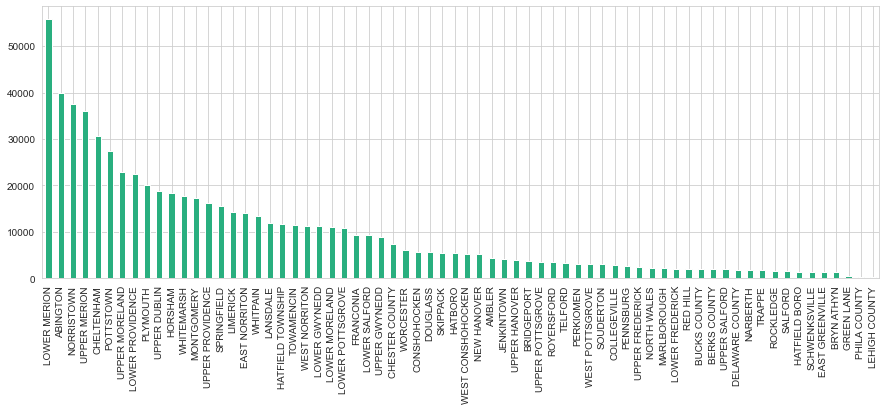

In [24]:
#Demonstração gráfica da quantidade de chamadas por cidade
calls = df.groupby('twp').count().sort_values(by='e', ascending=False)
calls['e'].plot(kind='bar', figsize=(15,5), rot=90, xlabel='', color='#29af7f')

Quantos títulos de chamadas diferentes existem?

In [25]:
df['title'].nunique()

148

Como estão distribuídas as chamadas em relação aos motivos?

In [26]:
df['reasons'].value_counts()

EMS        332692
TRAFFIC    230208
FIRE       100622
Name: reasons, dtype: int64

Text(0, 0.5, '')

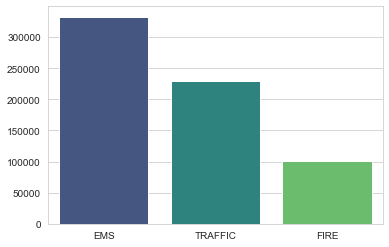

In [27]:
#Demonstrando graficamente como estão distribuídos os motivos das chamdas
sns.countplot(data=df, x='reasons', order=['EMS', 'TRAFFIC', 'FIRE'], palette='viridis')

#Removendo os nomes do eixos
plt.xlabel('')
plt.ylabel('')

Como as chamadas de emergência estão distribuídas ao longo da semana?

Text(0, 0.5, '')

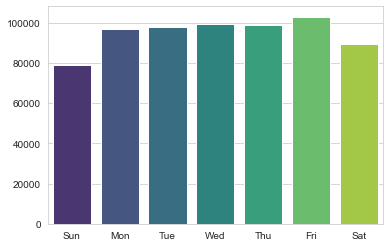

In [28]:
sns.countplot(data=df, x='dayWeek', order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], palette='viridis')
plt.xlabel('')
plt.ylabel('')

Quais chamadas acontecem em cada dia da semana?

Text(0.5, 0, '')

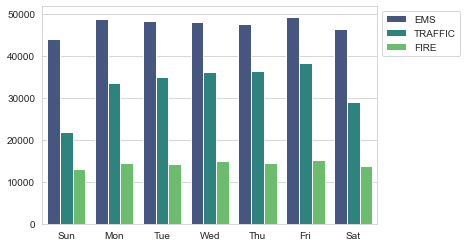

In [29]:
sns.countplot(data=df, x='dayWeek', hue='reasons', order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], hue_order=['EMS', 'TRAFFIC', 'FIRE'], palette='viridis')

#Colocando as legendas fora do gráfico
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('')
plt.xlabel('')

Como as chamadas de emergência estão distribuídas ao longo dos meses?

<AxesSubplot:xlabel='month', ylabel='count'>

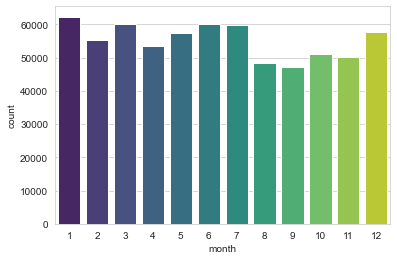

In [30]:
sns.countplot(data=df, x='month', palette='viridis')

Quais chamadas acontecem em cada mês?

Text(0, 0.5, '')

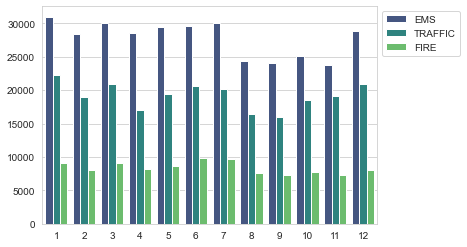

In [31]:
sns.countplot(data=df, x='month', hue='reasons', hue_order=['EMS', 'TRAFFIC', 'FIRE'], palette='viridis')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('')
plt.ylabel('')

Quais os horários mais comuns para cada tipo de chamada?

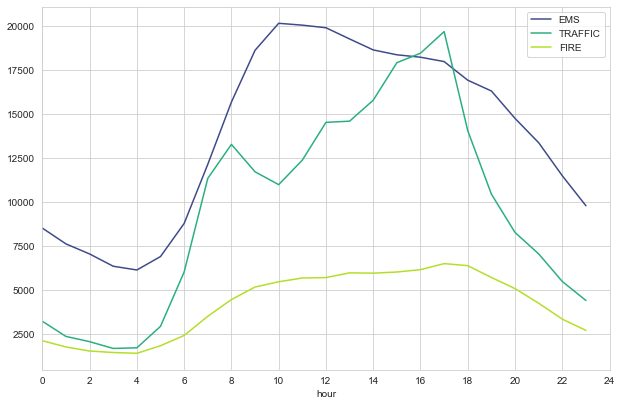

In [32]:
figura, eixo = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
eixo.plot(df[df['reasons'] == 'EMS'].groupby('hour').count()['e'], label='EMS', color='#3E4A89')
eixo.plot(df[df['reasons'] == 'TRAFFIC'].groupby('hour').count()['e'], label='TRAFFIC', color='#29af7f')
eixo.plot(df[df['reasons'] == 'FIRE'].groupby('hour').count()['e'], label='FIRE', color='#B4DE28')
eixo.legend()
eixo.set_xlabel('hour')
eixo.set_xticks(np.arange(0, 25, 2))
eixo.set_xlim(0, 24)
figura.tight_layout(pad=2)

Quais são os anos em que as informações foram coletadas? Como se dá a progressão das chamadas ao longo dos anos?

In [33]:
df['year'].value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
2020     72258
2015      7916
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

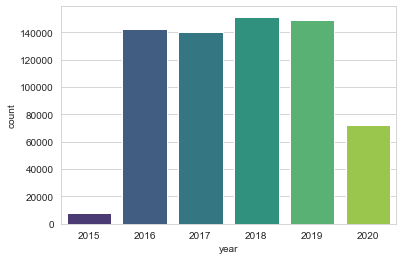

In [34]:
sns.countplot(data=df, x='year', palette='viridis')

Como estão distribuídas as chamadas em relação as horas na semana?

<AxesSubplot:xlabel='hour', ylabel='dayWeek'>

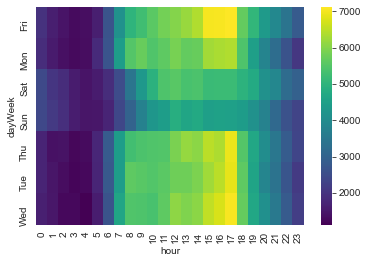

In [35]:
wh = df.groupby(by=['dayWeek', 'hour']).count()['e'].unstack()
sns.heatmap(wh, cmap='viridis')

Como estão distribuídas as chamadas em relação aos dias da semana nos meses?

<AxesSubplot:xlabel='dayWeek', ylabel='month'>

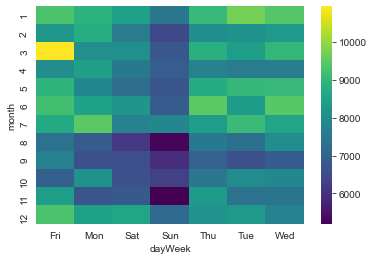

In [36]:
mw = df.groupby(by=['month', 'dayWeek']).count()['e'].unstack()
sns.heatmap(mw, cmap='viridis')

## 4. Conclusão

Sobre o processamento dos dados ausentes eles não interferem de maneira expressiva nesta análise, visto que os dados preenchidos da coluna *zip* (código postal) representam 12.08% da base de dados, porém esta coluna não foi relevante. Já o tratamento dos dados ausentes da coluna *twp* (nome do município) representa 0.04% da base de dados, uma variação ínfima.

Respondendo às perguntas básicas fica evidente a distribuição das chamadas de emergências ao longo do tempo, seja analisando o dia ou a semana ou os anos. Ao longo das semanas os horários com mais chamadas é entre às 15 h e às 17 h. As sextas-feiras do mês de março são as mais movimentadas.

Ao longo do dia, por volta das 10 h, ocorrem mais chamadas da categoria *EMS* (que necessitam de suporte médico). Por volta das 17 h ocorrem mais chamadas do tipo *TRAFFIC* (relacionadas a trânsito). As chamadas da categoria *FIRE* (relacionadas acionamento dos bombeiros) são a minoria em qualquer horário.

Analisando ao longo dos dias de uma semana e dos meses em um ano o dia com mais chamadas acontece as sextas-feiras no mês de janeiro. É importante ressaltar que aparentemente os dados começaram a ser coletados em 2015 e a última atualização da base de dados se deu em meados de 2020, isso justifica uma quantidade tão pequena quando comparada com os outros anos.

A categoria de chamada mais comum é *EMS*, representando 50.14% dos motivos de chamadas de emergência. Esta categoria é indiscutivelmente a mais relevante. 

Por essas análises conclui-se que empresas e serviços relacionados a área da saúde têm um mercado amplo, seja de maneira a prevenir incidentes ou de maneira a tratar os incidentes.